In [3]:
#import libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
#import dataset

data_set = pd.read_csv(r"C:\Users\Hali Siew\Projects\highest_earning_teams.csv")

In [5]:
#read data

data_set

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter
...,...,...,...,...,...,...
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [6]:
#Data's head
data_set.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [7]:
#Data's tail
data_set.tail()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
923,24781,Rex Regum Qeon,6286.8,2,Arena of Valor,Multiplayer Online Battle Arena
924,261,Alliance,4000.0,1,Arena of Valor,Multiplayer Online Battle Arena
925,713,Marines Esports,3429.6,1,Arena of Valor,Multiplayer Online Battle Arena
926,608,British National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena
927,584,Swedish National Team,2500.0,1,Arena of Valor,Multiplayer Online Battle Arena


In [8]:
#The number of rows and columns 
data_set.shape

(928, 6)

In [9]:
#Name of all columns 
data_set.columns

Index(['TeamId', 'TeamName', 'TotalUSDPrize', 'TotalTournaments', 'Game',
       'Genre'],
      dtype='object')

In [10]:
#The data type of all columns
data_set.dtypes

TeamId                int64
TeamName             object
TotalUSDPrize       float64
TotalTournaments      int64
Game                 object
Genre                object
dtype: object

In [11]:
#Dataset's info
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 43.6+ KB


In [12]:
#Checking for any duplicates 
data_set[data_set.duplicated()]

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre


In [13]:
#Checking for any null values
data_set.isnull().sum()

TeamId              0
TeamName            0
TotalUSDPrize       0
TotalTournaments    0
Game                0
Genre               0
dtype: int64

<AxesSubplot:xlabel='TeamName', ylabel='TotalUSDPrize'>

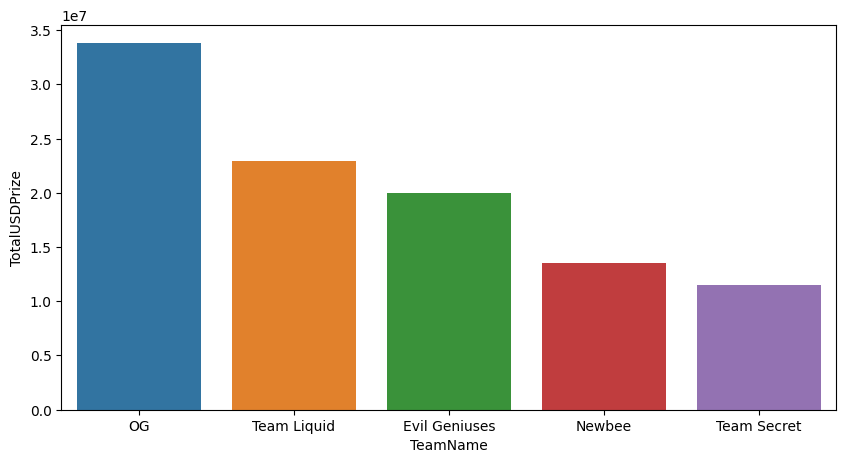

In [14]:
#Finding the team who won the most 

fig, ax = plt.subplots(figsize = (10,5))
data = data_set.nlargest(5, 'TotalUSDPrize')
sns.barplot(x='TeamName', y= 'TotalUSDPrize', ax=ax, data=data)

In [77]:
#Find the sum of each game's tournament
df = pd.DataFrame(data_set)
pd.options.display.float_format = '{:.2f}'.format
prize_money = df.groupby('Game')['TotalUSDPrize'].sum().reset_index()
prize_money = prize_money.sort_values(by='TotalUSDPrize', ascending=False)
prize_money

,Game,TotalUSDPrize
2,Dota 2,220282764.57
1,Counter-Strike: Global Offensive,84853934.16
6,League of Legends,64665560.92
3,Fortnite,34661332.81
9,Starcraft II,27856145.24
7,Overwatch,20465267.66
8,PUBG,16715000.28
4,Hearthstone,10864526.98
5,Heroes of the Storm,10710522.66
0,Arena of Valor,9969148.62


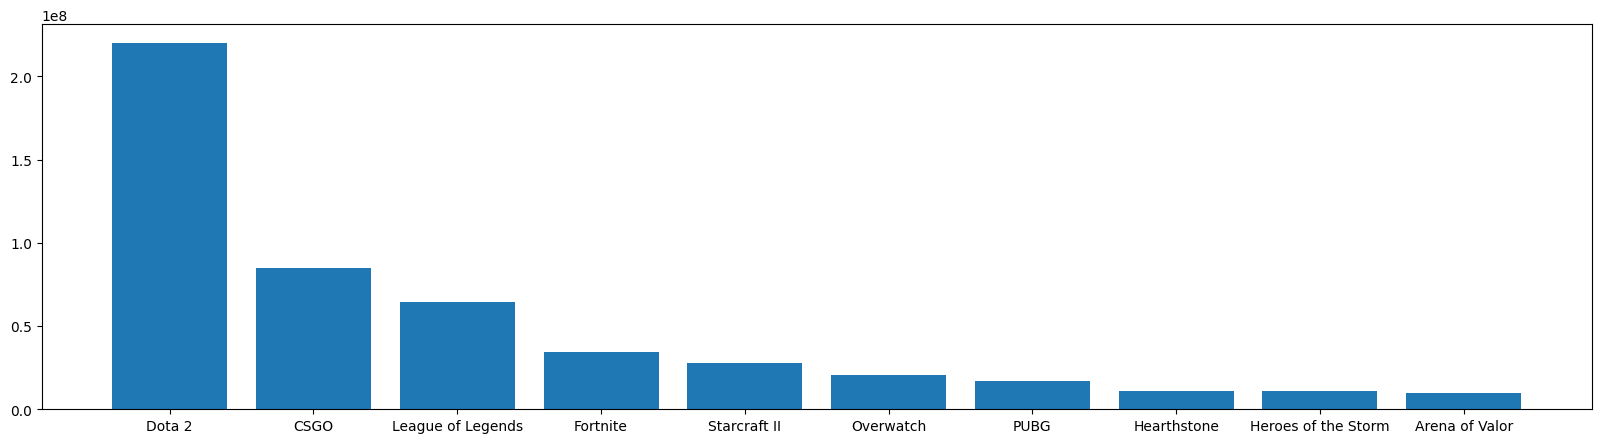

In [92]:
#Rename Counter-Strike: Global Offensive to CSGO for better formatting
prize_money['Game'] = prize_money['Game'].replace('Counter-Strike: Global Offensive', 'CSGO')

#Plotting
fig,ax = plt.subplots(figsize=(20, 5))
labels = prize_money['Game']
prizes = prize_money['TotalUSDPrize'].sort_values(ascending=False)
plt.bar(labels, height = prizes)
plt.show()

In [80]:
#Total number of tournament per game 

game_total = df.groupby('Game')['TotalTournaments'].sum().reset_index()
game_total = game_total.sort_values(by='TotalTournaments', ascending =False)
game_total

,Game,TotalTournaments
9,Starcraft II,12676
1,Counter-Strike: Global Offensive,5996
2,Dota 2,2931
6,League of Legends,2515
5,Heroes of the Storm,1663
3,Fortnite,1229
8,PUBG,828
7,Overwatch,772
4,Hearthstone,662
0,Arena of Valor,142


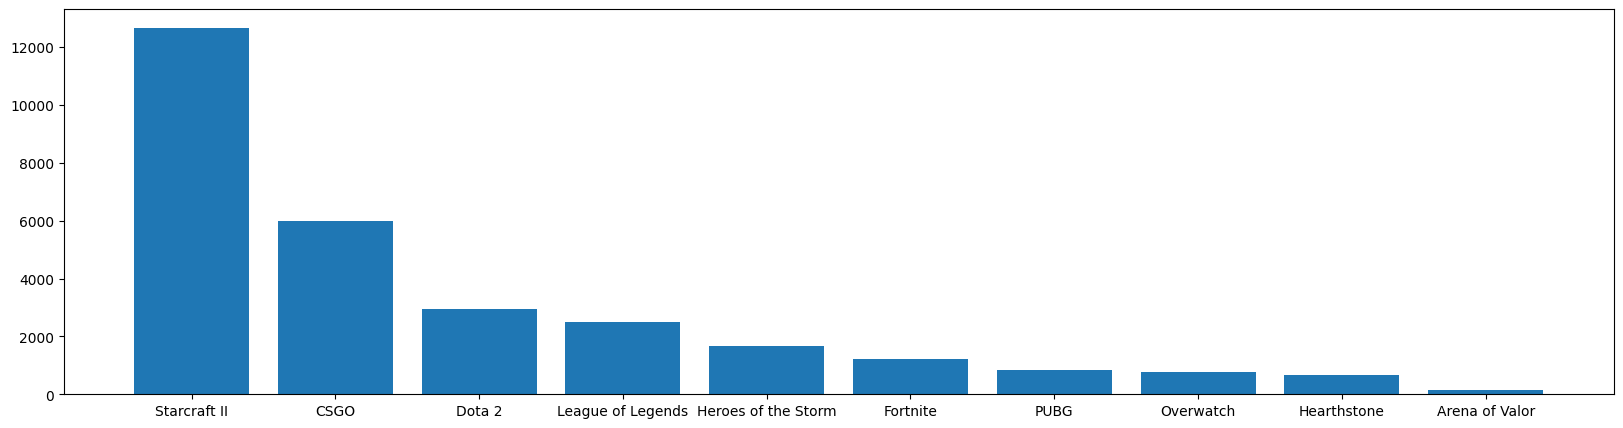

In [88]:
#Rename for better formatting 
game_total['Game'] = game_total['Game'].replace('Counter-Strike: Global Offensive', 'CSGO')

#Plotting 
fig, ax = plt.subplots(figsize=(20,5))
labels = game_total['Game']
total = game_total['TotalTournaments']
plt.bar(labels,height = total)
plt.show()